In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank_personal_loan.csv', delimiter=';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
df.sample(5)

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
4999  5000   28           4      83     92612       3    0.8          1   
3495  3496   32           8      44     91401       1    1.8          2   
2730  2731   56          30      43     90401       2    0.3          1   
3431  3432   64          38      63     94305       2    1.7          3   
1088  1089   59          35      95     95521       1    3.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
4999         0              0                   0           0       1   
3495       192              0                   0           0       1   
2730         0              0                   1           0       0   
3431       184              0                   1           0       1   
1088         0              0                   0           0       1   

      CreditCard  
4999           1  
3495           0  
2730           0  
3431           0  
1088           1

In [5]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [22]:
negative_value = df[df["Experience"]<0]
negative_value

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
89      90   25          -1     113     94303       4   2.30          3   
226    227   24          -1      39     94085       2   1.70          2   
315    316   24          -2      51     90630       3   0.30          3   
451    452   28          -2      48     94132       2   1.75          3   
524    525   24          -1      75     93014       4   0.20          1   
536    537   25          -1      43     92173       3   2.40          2   
540    541   25          -1     109     94010       4   2.30          3   
576    577   25          -1      48     92870       3   0.30          3   
583    584   24          -1      38     95045       2   1.70          2   
597    598   24          -2     125     92835       2   7.20          1   
649    650   25          -1      82     92677       4   2.10          3   
670    671   23          -1      61     92374       4   2.60          1   
686    687   24          -1      38     92612       4   0.60          2   
793    794   24          -2     150     94720       2   2.00          1   
889    890   24          -2      82     91103       2   1.60          3   
909    910   23          -1     149     91709       1   6.33          1   
1173  1174   24          -1      35     94305       2   1.70          2   
1428  1429   25          -1      21     94583       4   0.40          1   
1522  1523   25          -1     101     94720       4   2.30          3   
1905  1906   25          -1     112     92507       2   2.00          1   
2102  2103   25          -1      81     92647       2   1.60          3   
2430  2431   23          -1      73     92120       4   2.60          1   
2466  2467   24          -2      80     94105       2   1.60          3   
2545  2546   25          -1      39     94720       3   2.40          2   
2618  2619   23          -3      55     92704       3   2.40          2   
2717  2718   23          -2      45     95422       4   0.60          2   
2848  2849   24          -1      78     94720       2   1.80          2   
2876  2877   24          -2      80     91107       2   1.60          3   
2962  2963   23          -2      81     91711       2   1.80          2   
2980  2981   25          -1      53     94305       3   2.40          2   
3076  3077   29          -1      62     92672       2   1.75          3   
3130  3131   23          -2      82     92152       2   1.80          2   
3157  3158   23          -1      13     94720       4   1.00          1   
3279  3280   26          -1      44     94901       1   2.00          2   
3284  3285   25          -1     101     95819       4   2.10          3   
3292  3293   25          -1      13     95616       4   0.40          1   
3394  3395   25          -1     113     90089       4   2.10          3   
3425  3426   23          -1      12     91605       4   1.00          1   
3626  3627   24          -3      28     90089       4   1.00          3   
3796  3797   24          -2      50     94920       3   2.40          2   
3824  3825   23          -1      12     95064       4   1.00          1   
3887  3888   24          -2     118     92634       2   7.20          1   
3946  3947   25          -1      40     93117       3   2.40          2   
4015  4016   25          -1     139     93106       2   2.00          1   
4088  4089   29          -1      71     94801       2   1.75          3   
4116  4117   24          -2     135     90065       2   7.20          1   
4285  4286   23          -3     149     93555       2   7.20          1   
4411  4412   23          -2      75     90291       2   1.80          2   
4481  4482   25          -2      35     95045       4   1.00          3   
4514  4515   24          -3      41     91768       4   1.00          3   
4582  4583   25          -1      69     92691       3   0.30          3   
4957  4958   29          -1      50     95842       2   1.75          3   

      Mortgage  Personal Loan  S

In [23]:
df["Experience"].describe()

count    5000.000000
mean       20.104600
std        11.467954
min        -3.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [24]:
df[df['Experience'] < 0]['Experience'].value_counts()        

Experience
-1    33
-2    15
-3     4
Name: count, dtype: int64

In [25]:
df.loc[df['Experience']<0,'Experience']=np.abs(df['Experience'])

In [26]:
df.sample(5)

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
2684  2685   30           5      98     92028       4    1.8          3   
699    700   44          20      68     95060       1    0.8          3   
3747  3748   26           0      83     91360       3    3.9          2   
2954  2955   31           7      42     95822       1    2.4          2   
3480  3481   64          39      49     94591       2    1.5          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
2684       129              0                   1           1       1   
699         91              0                   0           0       0   
3747         0              1                   0           0       1   
2954         0              0                   0           0       1   
3480         0              0                   1           0       1   

      CreditCard  
2684           1  
699            0  
3747           0  
2954           1  
3480           0

In [27]:
df["Experience"].describe()

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [28]:
df.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [36]:
#on va devisé les columns a des columns categorial et des columns numerique

In [30]:
categorial_variable = []
numerical_variable = []
for col in df.columns:
    if df[col].nunique()<5:
        categorial_variable.append(col)
    else:
        numerical_variable.append(col)

In [32]:
for col in numerical_variable:
    print(col)

ID
Age
Experience
Income
ZIP Code
CCAvg
Mortgage


In [42]:
# on a supprimer la column ID 

In [41]:
numerical_variable

['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']

In [33]:
for col in categorial_variable:
    print(col)

Family
Education
Personal Loan
Securities Account
CD Account
Online
CreditCard


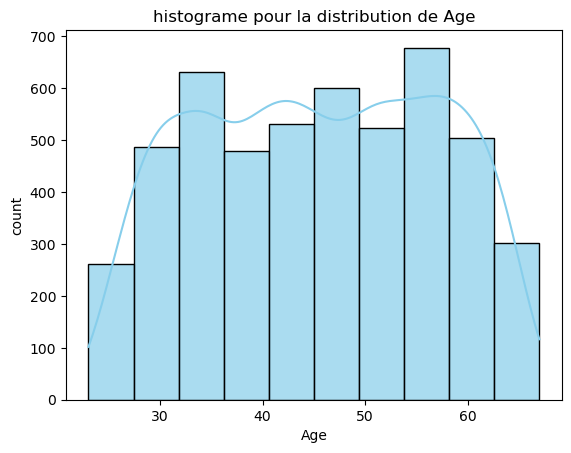

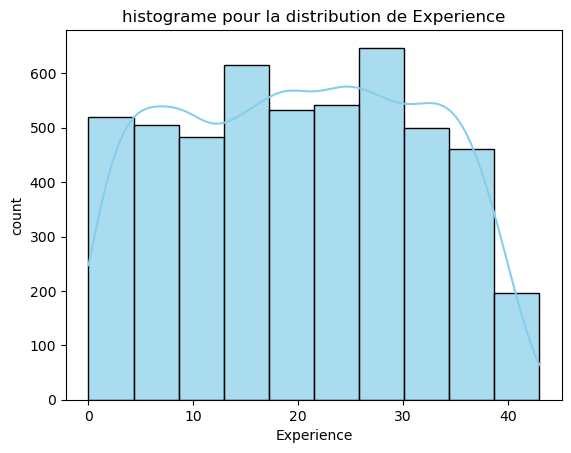

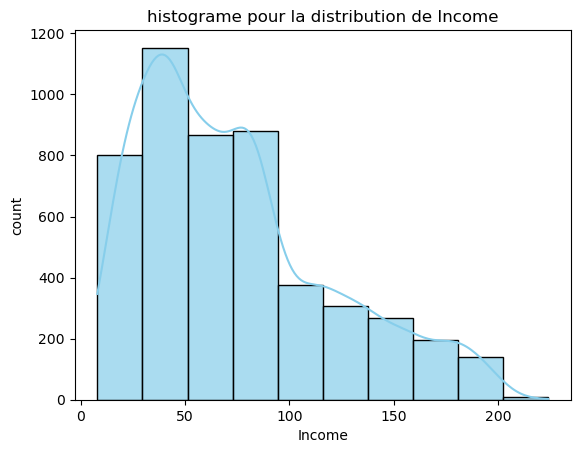

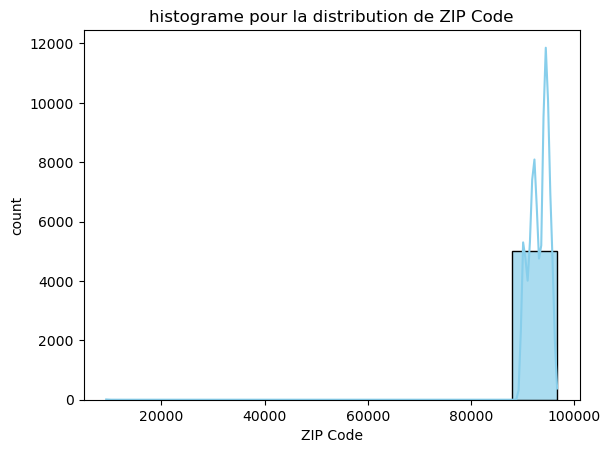

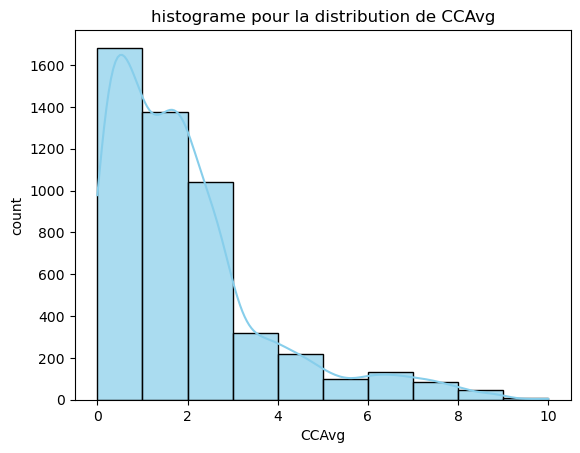

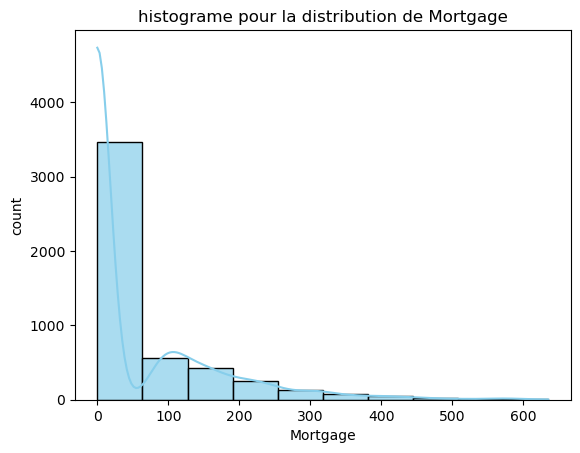

In [46]:
for col in numerical_variable:
    plt.figure()
    sns.histplot(df[col],bins = 10, color= "skyblue",alpha = 0.7,kde=True)
    plt.title(f"histograme pour la distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("count")

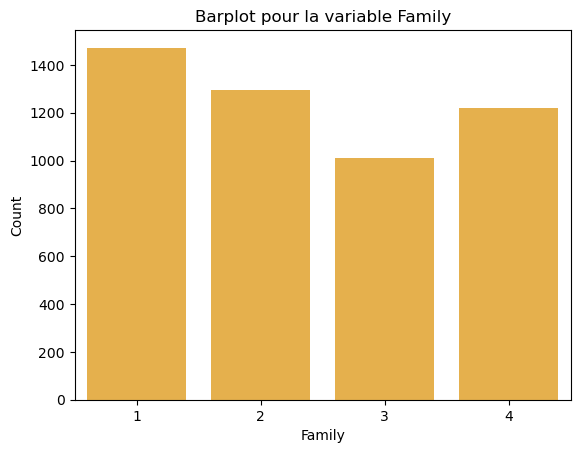

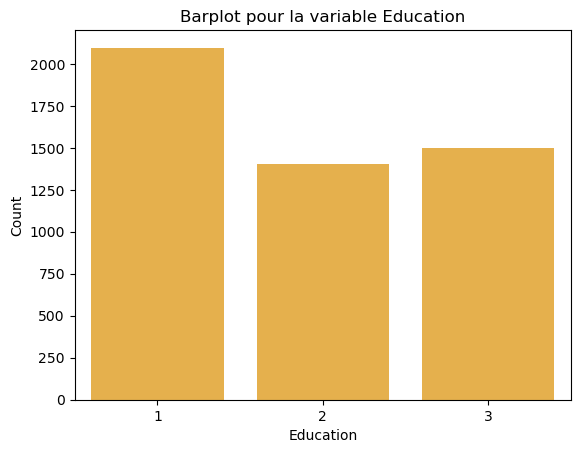

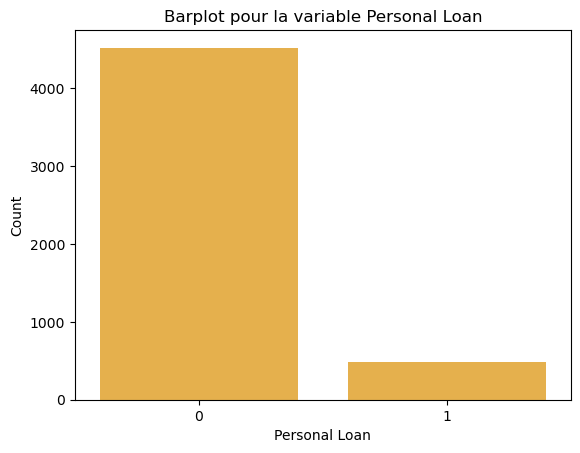

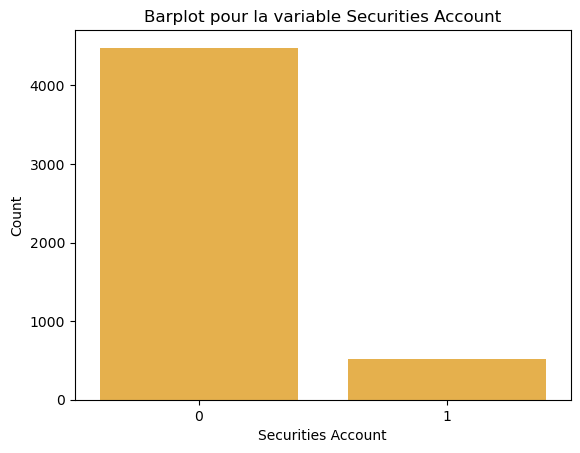

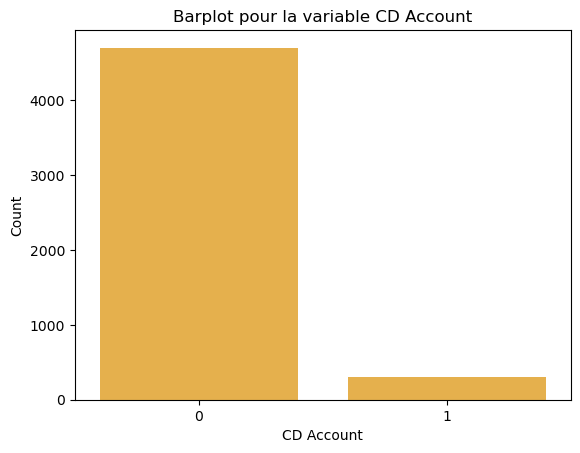

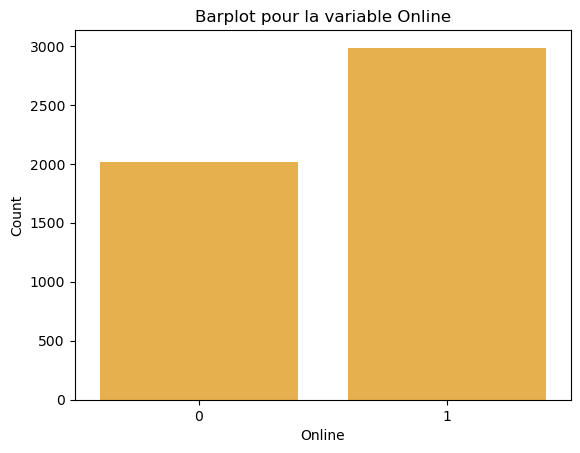

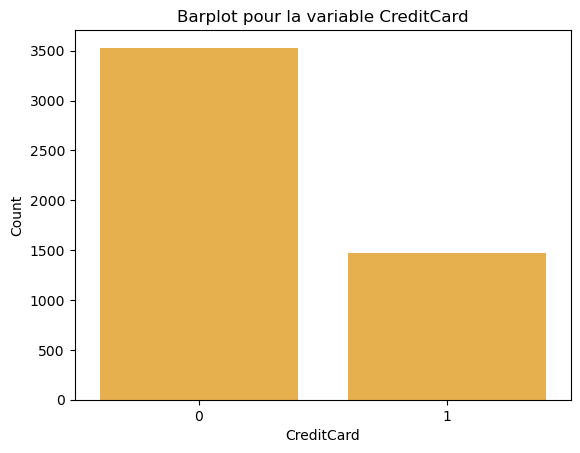

In [50]:
for col in categorial_variable:
    plt.figure()
    sns.countplot(data=df, x=col, color="orange", alpha=0.8)
    plt.title(f"Barplot pour la variable {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

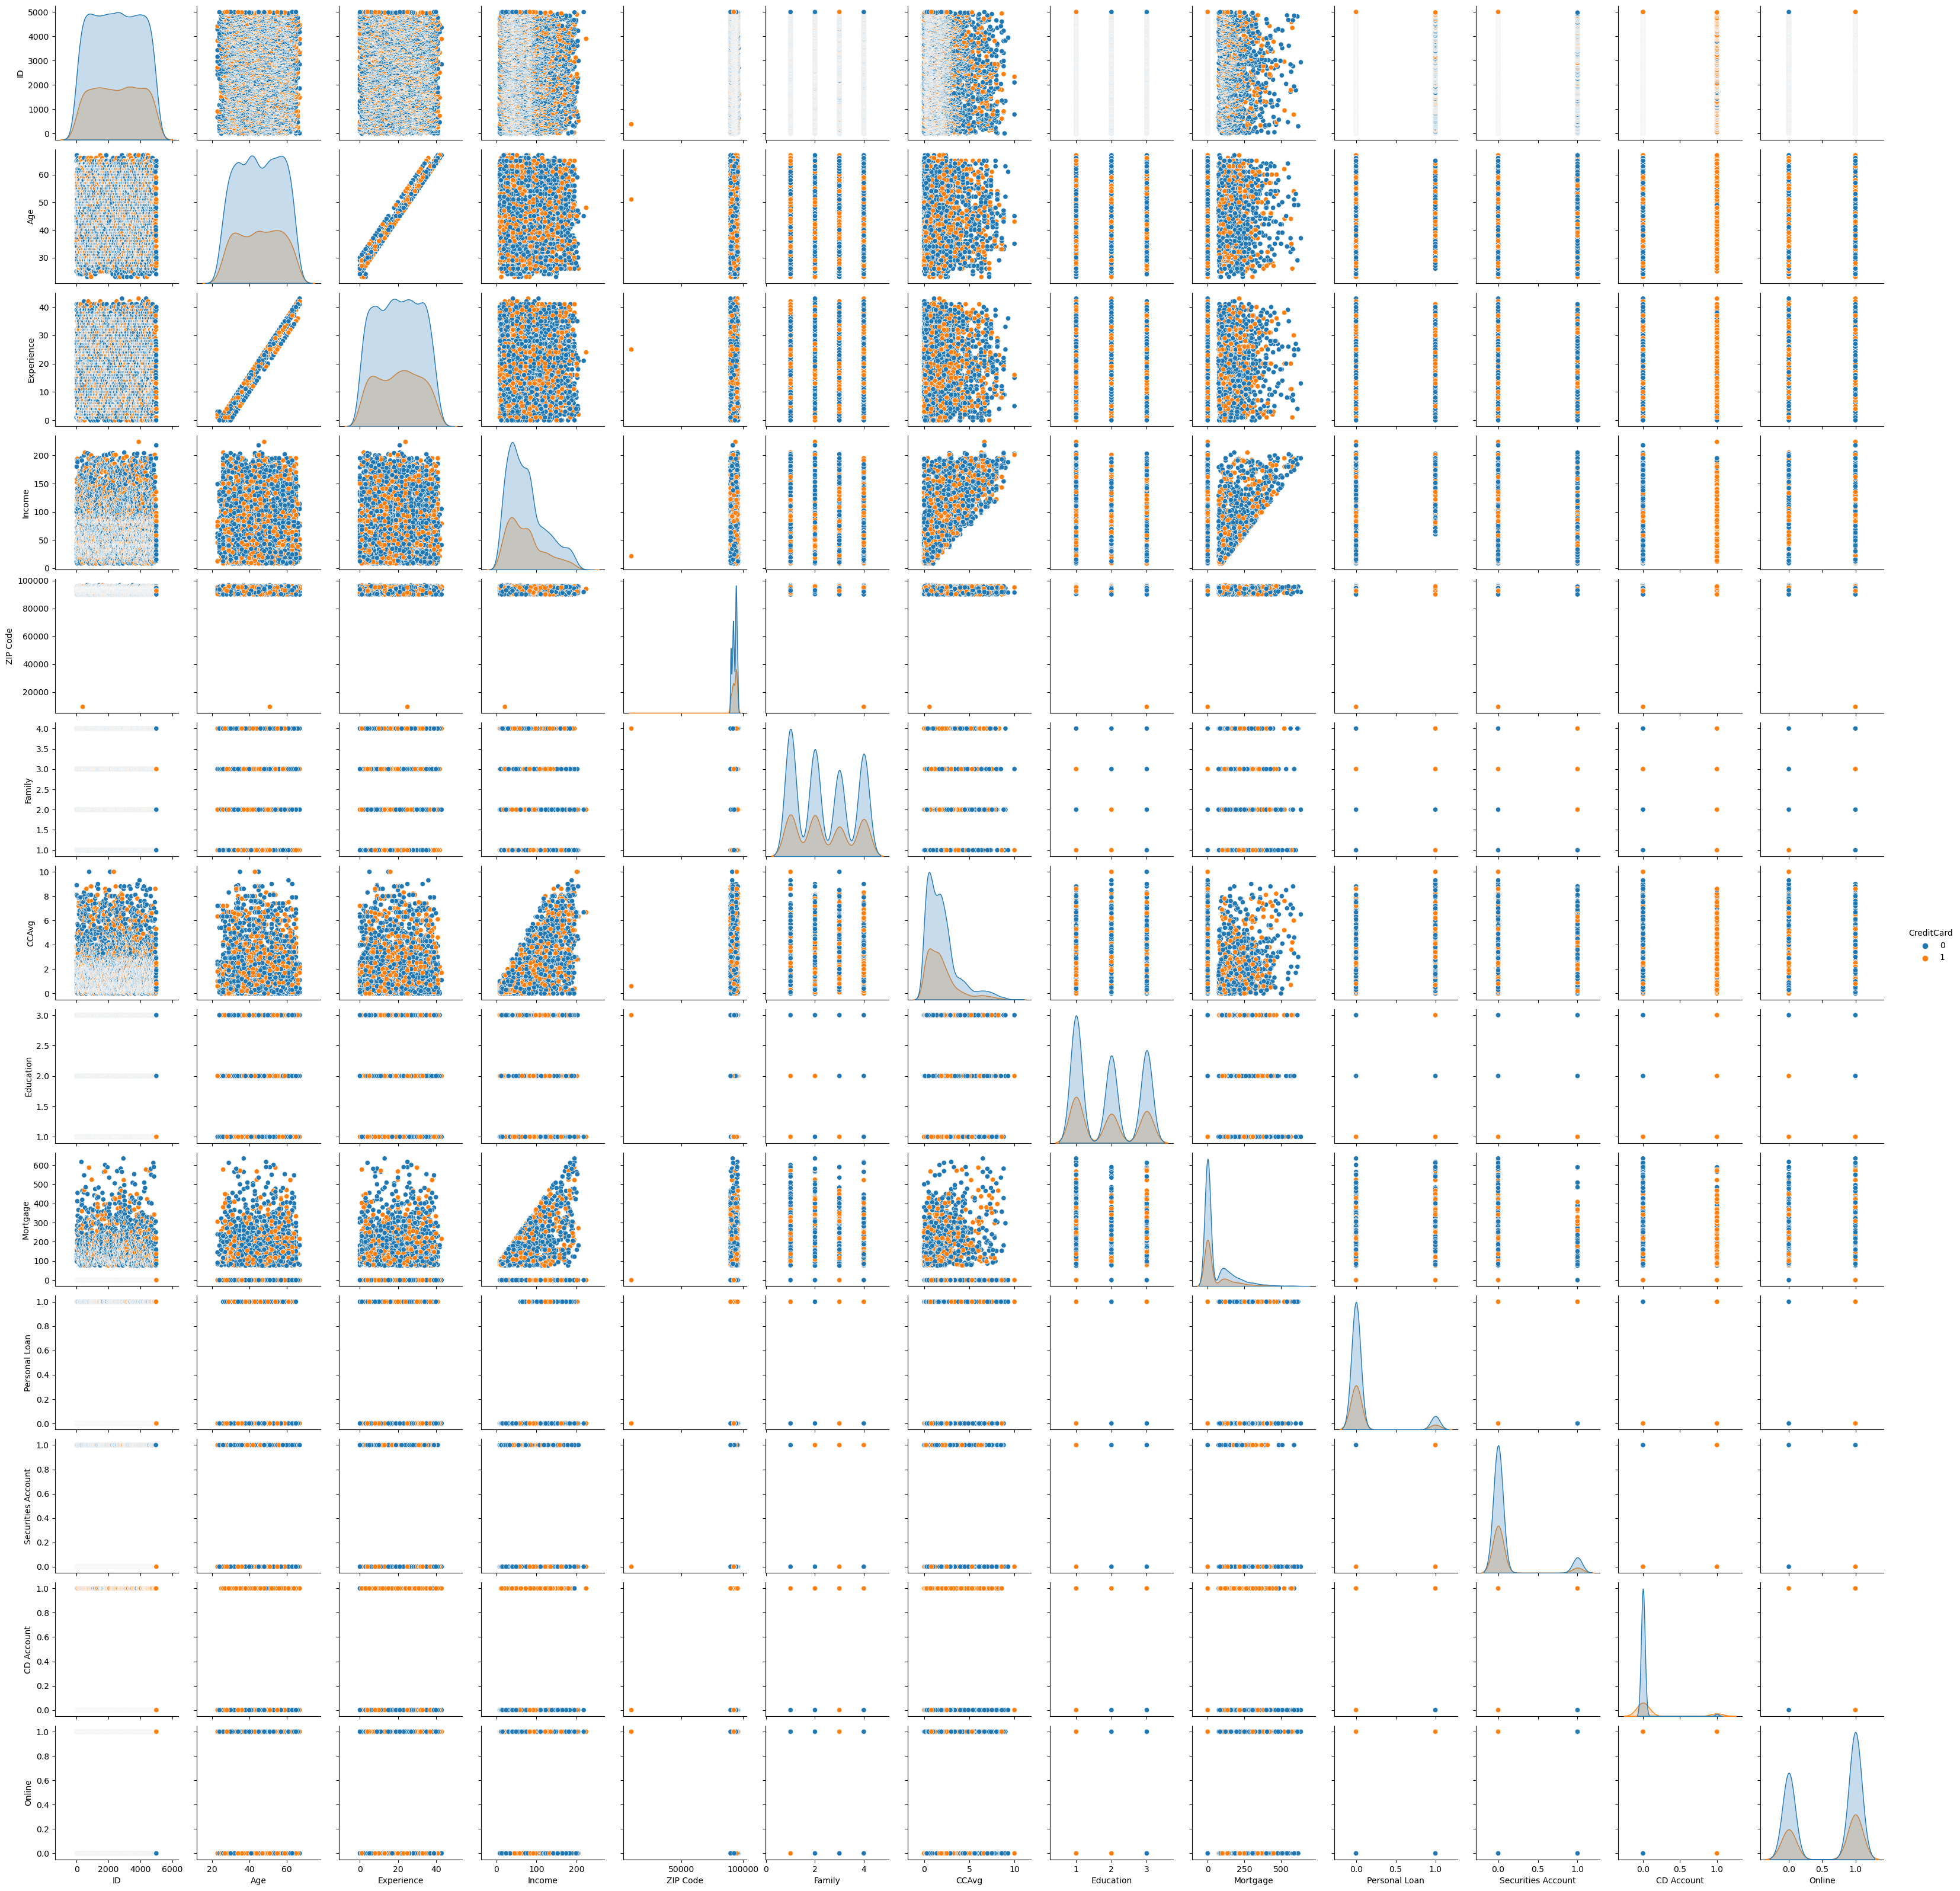

In [83]:
sns.pairplot(df,hue='CreditCard')

In [53]:
# application de kmeans

In [54]:
df_kmeans = df

In [58]:
df_kmeans.drop("ID",axis = 1)

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1      49     91107       4    1.6          1         0   
1      45          19      34     90089       3    1.5          1         0   
2      39          15      11     94720       1    1.0          1         0   
3      35           9     100     94112       1    2.7          2         0   
4      35           8      45     91330       4    1.0          2         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4995   29           3      40     92697       1    1.9          3         0   
4996   30           4      15     92037       4    0.4          1        85   
4997   63          39      24     93023       2    0.3          3         0   
4998   65          40      49     90034       3    0.5          2         0   
4999   28           4      83     92612       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 13 columns]

In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [64]:
cluster = []
silh_score = []
for i in range(2,15):
    km = KMeans(n_clusters=i)
    km.fit(df_kmeans)
    cluster.append(km.inertia_)
    silh_score.append(silhouette_score(df_kmeans,km.labels_,metric="euclidean"))

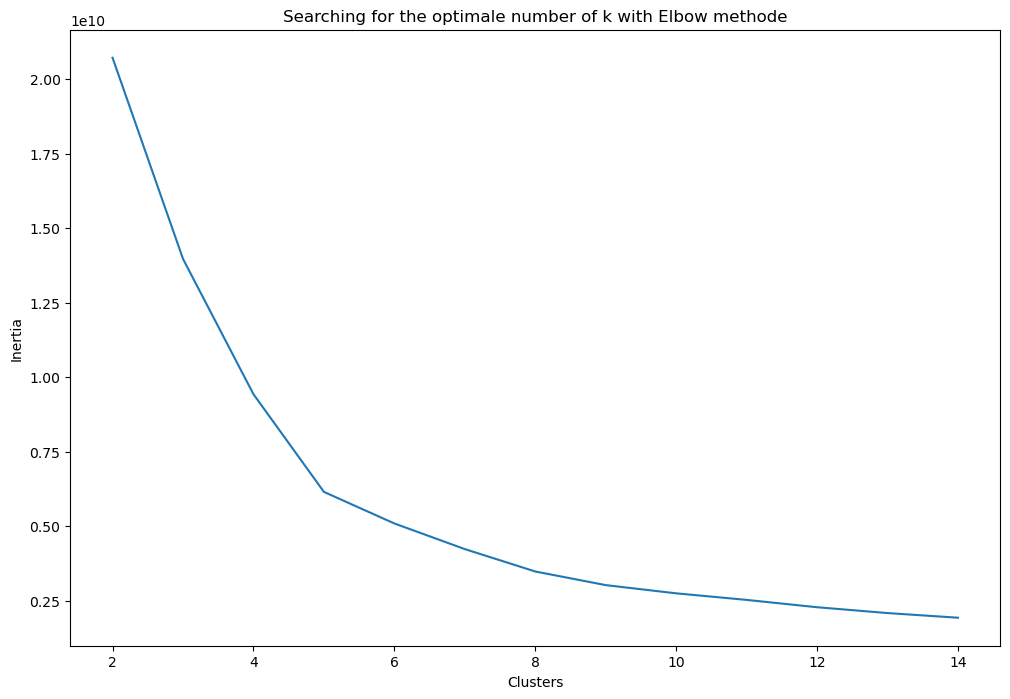

In [70]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(2, 15)), y=cluster, ax=ax)
ax.set_title('Searching for the optimale number of k with Elbow methode')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()

Text(0, 0.5, 'Silhouette Score')

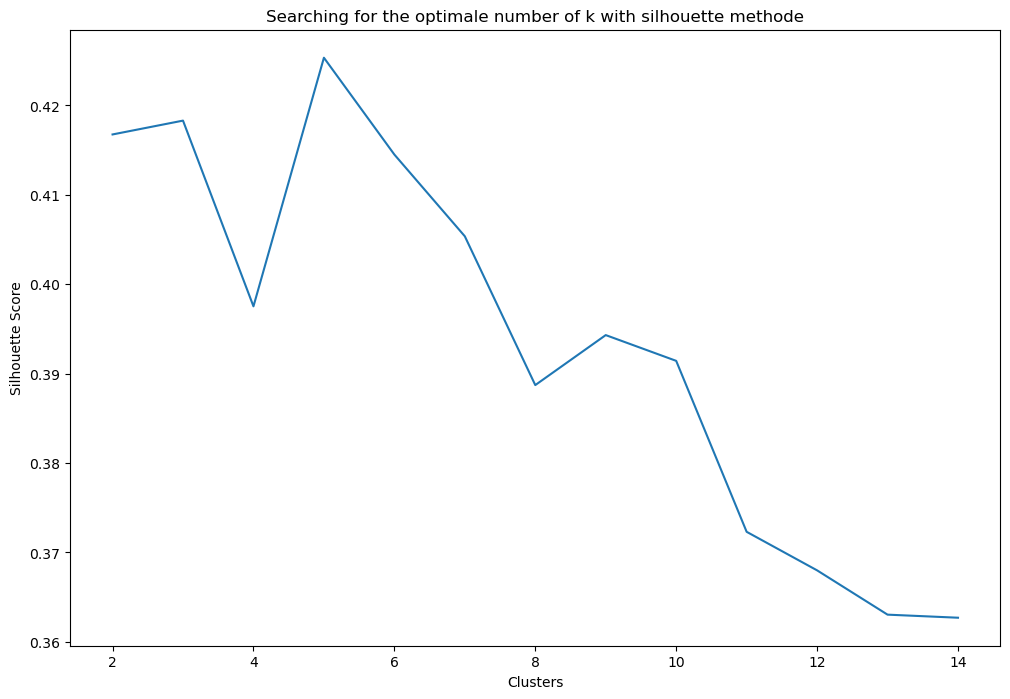

In [66]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(2, 15)), y=silh_score, ax=ax)
ax.set_title('Searching for the optimale number of k with silhouette methode')
ax.set_xlabel('Clusters')
ax.set_ylabel('Silhouette Score')

In [71]:
print(silhouette_score(df_kmeans, km.labels_, metric='euclidean'))

0.3626958570226666


In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_kmeans)

In [91]:
# the optimale number of K is 5
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(scaled_data)

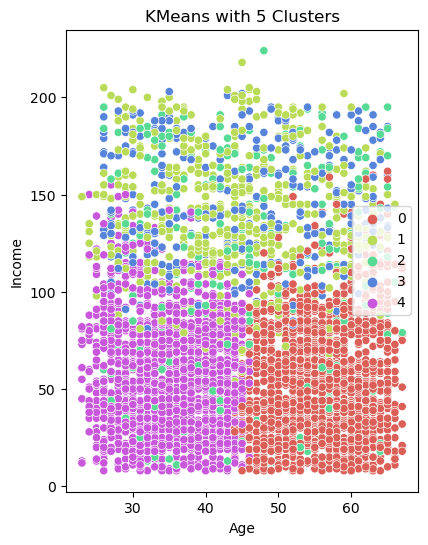

In [92]:
df_kmeans['Labels'] = kmeans.labels_
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(121)
sns.scatterplot(data=df_kmeans, x='Age', y='Income', hue='Labels', 
                palette=sns.color_palette('hls', 5), ax=ax)
ax.set_title('KMeans with 5 Clusters')
ax.legend(loc='center right')
plt.show()